# Code For Grain Encrption Cipher - A Stream Cipher

In [1]:
import numpy as np
import binascii

In [2]:
## Hepler functions for interconversion of bits and strings

def text_to_bits(text, encoding='utf-8', errors='surrogatepass'):
    bits = bin(int(binascii.hexlify(text.encode(encoding, errors)), 16))[2:]
    return bits.zfill(8 * ((len(bits) + 7) // 8))

def text_from_bits(bits, encoding='utf-8', errors='surrogatepass'):
    n = int(bits, 2)
    return int2bytes(n).decode(encoding, errors)

def int2bytes(i):
    hex_string = '%x' % i
    n = len(hex_string)
    return binascii.unhexlify(hex_string.zfill(n + (n & 1)))

def string2bits(s=''):
    return [bin(ord(x))[2:].zfill(8) for x in s]

def bits2string(b=None):
    return ''.join([chr(int(x, 2)) for x in b])

In [3]:
## Main building blocks of Grain Cipher, namely a Linear Feedback Shift Register (LFSR)
## and a Non-linear Feedback Shift Register (NFSR)

lfsr = np.zeros(80,dtype=bool)
nfsr = np.zeros(80,dtype=bool)

## Initialise LFSR and NFSR using IV and Secret Key
## First load the NFSR with the key bits, bi = ki, 0 ≤ i ≤ 79,
## then load the first 64 bits of the LFSR with the IV, si = IVi, 0 ≤ i ≤ 63.
## The remaining bits of the LFSR are filled with ones, si = 1, 64 ≤ i ≤ 79.
## Because of this the LFSR cannot be initialized to the all zero state.

def init(iv,key):
    iv_bin = string2bits(iv)
    iv_bin = ''.join(iv_bin)
    lfsr[:64] = [bool(int(iv_bin[ix])) for ix in range(len(iv_bin))]
    lfsr[64:] = 1
    key_bin = string2bits(key)
    key_bin = ''.join(key_bin)
    nfsr[:] = [bool(int(key_bin[ix])) for ix in range(len(key_bin))]

    
## The cipher is clocked 160 times without producing any running key
## The output of the filter function, h(x), is fed back and xored with the input, both to the LFSR and to the NFSR

def clock():
    hx=0
    fx=0
    gx=0
    global lfsr
    global nfsr
    for ix in range(160):
        fx = lfsr[62] ^ lfsr[51] ^ lfsr[38] ^ lfsr[23] ^ lfsr[13] ^ lfsr[0] ^ hx
        gx = hx ^ nfsr[0] ^ nfsr[63] ^ nfsr[60] ^ nfsr[52] ^ nfsr[45] ^ nfsr[37] ^ nfsr[33] ^ nfsr[28] ^ nfsr[21] ^ nfsr[15] ^ nfsr[19] ^ nfsr[0] ^ nfsr[63] & nfsr[60] ^ nfsr[37] & nfsr[33] ^ nfsr[15] & nfsr[9] ^ nfsr[60] & nfsr[52] & nfsr[45] ^ nfsr[33] & nfsr[28] & nfsr[21] ^ nfsr[63] & nfsr[45] & nfsr[28] & nfsr[9] ^ nfsr[60] & nfsr[52] & nfsr[37] & nfsr[33] ^ nfsr[63] & nfsr[60] & nfsr[21] & nfsr[15] ^ nfsr[63] & nfsr[60] & nfsr[52] & nfsr[45] & nfsr[37] ^ nfsr[33] & nfsr[28] & nfsr[21] & nfsr[15] & nfsr[9] ^ nfsr[52] & nfsr[45] & nfsr[37] & nfsr[33] & nfsr[28] & nfsr[21]
        x0 = lfsr[0]
        x1 = lfsr[25]
        x2 = lfsr[46]
        x3 = lfsr[64]
        x4 = nfsr[63]
        hx = x1 ^ x4 ^ x0 & x3 ^ x2 & x3 ^ x3 & x3 ^ x0 & x1 & x2 ^ x0 & x2 & x3 ^ x0 & x2 & x4 ^ x1 & x2 & x4 ^ x2 & x3 & x4
        lfsr[:-1] = lfsr[1:]
        lfsr[-1] = fx
        nfsr[:-1] = nfsr[1:]
        nfsr[-1] = gx    
        
        
        
## Return a stream generator which implements the filter function

def gen_key_stream():
    hx = 0
    while True:
        fx = lfsr[62] ^ lfsr[51] ^ lfsr[38] ^ lfsr[23] ^ lfsr[13] ^ lfsr[0]
        gx = nfsr[0] ^ nfsr[63] ^ nfsr[60] ^ nfsr[52] ^ nfsr[45] ^ nfsr[37] ^ nfsr[33] ^ nfsr[28] ^ nfsr[21] ^ nfsr[15] ^ nfsr[19] ^ nfsr[0] ^ nfsr[63] & nfsr[60] ^ nfsr[37] & nfsr[33] ^ nfsr[15] & nfsr[9] ^ nfsr[60] & nfsr[52] & nfsr[45] ^ nfsr[33] & nfsr[28] & nfsr[21] ^ nfsr[63] & nfsr[45] & nfsr[28] & nfsr[9] ^ nfsr[60] & nfsr[52] & nfsr[37] & nfsr[33] ^ nfsr[63] & nfsr[60] & nfsr[21] & nfsr[15] ^ nfsr[63] & nfsr[60] & nfsr[52] & nfsr[45] & nfsr[37] ^ nfsr[33] & nfsr[28] & nfsr[21] & nfsr[15] & nfsr[9] ^ nfsr[52] & nfsr[45] & nfsr[37] & nfsr[33] & nfsr[28] & nfsr[21]
        x0 = lfsr[0]
        x1 = lfsr[25]
        x2 = lfsr[46]
        x3 = lfsr[64]
        x4 = nfsr[63]
        hx = x1 ^ x4 ^ x0 & x3 ^ x2 & x3 ^ x3 & x3 ^ x0 & x1 & x2 ^ x0 & x2 & x3 ^ x0 & x2 & x4 ^ x1 & x2 & x4 ^ x2 & x3 & x4
        lfsr[:-1] = lfsr[1:]
        lfsr[-1] = fx
        nfsr[:-1] = nfsr[1:]
        nfsr[-1] = gx
        yield hx
        
        
        
def encrypt(iv,key,plain, resume=False):
    
    if not resume :
        init(iv,key)
        clock()
    
    
    plain = text_to_bits(plain)
    stream = gen_key_stream()
    
    def printNext(stream) :
        a = next(stream)
        #print(a)
        return a
    
    cipher = [str(int(bool(int(plain[ix]))^printNext(stream))) for ix in range(len(plain))]
    cipher = ''.join(cipher)
    return cipher



def decrypt(iv,key,cipher):
    init(iv,key)
    clock()
    stream = gen_key_stream()
    plain = [str(int(bool(int(cipher[ix]))^next(stream))) for ix in range(len(cipher))]
    plain = ''.join(plain)
    plain = text_from_bits(plain)
    return plain



# Code for Compression

In [4]:
def decimalToBinary(num , places):
    return ('{0:0' +  str(places) + 'b}').format(num)


def binaryToDecimal(binary):
    return int(binary, 2)
        
def xorBinary(binary,key = "00000000"):
    i=0
    encBin = ""
    while(i<8):
        if(binary[i] == '0' and key[i] == '0') or (binary[i] == '1' and key[i] == '1'):
            encBin+="0"
        else:
            encBin+="1"
        i+=1
        
#     print(binary , key , encBin)    
    return encBin
    
def compressBinary(binary):
    i=0
    compressBin = ""
    while(i<8):
        if(i%2 == 0):
            if((binary[i] == '0' and binary[i+1] == '0') or (binary[i] == '1' and binary[i+1] == '1')):
                compressBin+="0"
            else:
                compressBin+="1"
        i+=1
        
    return compressBin

def to_twoscomplement(bits, value):
    if value < 0:
        value = ( 1<<bits ) + value
    formatstring = '{:0%ib}' % bits
    return formatstring.format(value)


# Code for Importing Data

In [5]:
import pandas as pd
article_read = pd.read_csv('dataset.csv',delimiter = ',')

In [6]:
# new_dataset = pd.Series(list(article_read['Temp.'].sample(101 , random_state=10)))
new_dataset = article_read['Temp.']

# new_dataset

# Code For Delta Coding

In [7]:
int_dataset = new_dataset.astype('int64')
int_dataset.describe()

count    928991.000000
mean         26.777991
std           0.945279
min          24.000000
25%          26.000000
50%          27.000000
75%          27.000000
max          30.000000
Name: Temp., dtype: float64

In [8]:
# int_dataset

In [9]:
diff_dataset = [0]
for i in range(1 , len(int_dataset)) :
        diff_dataset.append(int_dataset[i] - int_dataset[i-1])

In [10]:
diff_dataset = pd.Series(diff_dataset)

In [11]:
# diff_dataset

In [12]:
import seaborn as sns
%matplotlib inline


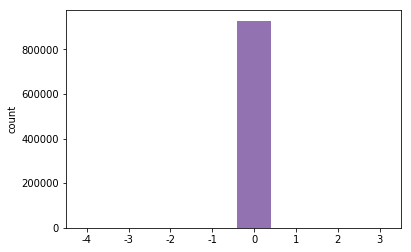

In [13]:
sns.countplot(diff_dataset)

In [55]:
diff_dataset.describe()

count    928991.000000
mean          0.000001
std           0.037278
min          -4.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
dtype: float64

# Main Logic

In [13]:
key = "0000000000"
iv = "00000000"

In [14]:
import time

In [75]:
import socket
# host = 'localhost'  # as both code is running on same pc

host = "192.168.43.136"
port = 5000  # socket server port number

message_array = []

In [76]:
def sendMessage(dataByte , socket):
    socket.send(dataByte)
    # print("Sent Byte")

In [77]:
def storeMessage(dataByte):
    message_array.append(dataByte)

In [81]:
def client_program(obv_factor):
    client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)  # instantiate
    client_socket.connect((host, port))  # connect to the server

    count = 1 
    handShake = to_twoscomplement(8 ,int_dataset[0])
    final = binaryToDecimal(handShake).to_bytes(1, byteorder="little")
    storeMessage(final)

    for i in range(1, int(len(diff_dataset) * obv_factor) , 2):
        combined = to_twoscomplement(4 , diff_dataset[i]) + to_twoscomplement(4 , diff_dataset[i+1])
        final = binaryToDecimal(combined).to_bytes(1, byteorder="little")
        storeMessage(final)
        count += 1
        #     time.sleep(1)

    for i in message_array :
        sendMessage(i , client_socket)


    print("Packets Transferred : " , count)    
    client_socket.send(''.encode())
    client_socket.close()  # close the connection
    

In [79]:
client_program()

Packets Transferred :  464496


In [89]:
observations = [1.0, 0.5, 0.25, 0.125, 0.0625]

for i in observations :
    for j in range(25) :
        time.sleep(1)
        message_array = []
        client_program(i)
        time.sleep(5)

Packets Transferred :  464496
Packets Transferred :  464496
Packets Transferred :  464496
Packets Transferred :  464496
Packets Transferred :  464496
Packets Transferred :  464496
Packets Transferred :  464496
Packets Transferred :  464496
Packets Transferred :  464496
Packets Transferred :  464496
Packets Transferred :  464496
Packets Transferred :  464496
Packets Transferred :  464496
Packets Transferred :  464496
Packets Transferred :  464496
Packets Transferred :  464496
Packets Transferred :  464496
Packets Transferred :  464496
Packets Transferred :  464496
Packets Transferred :  464496
Packets Transferred :  464496
Packets Transferred :  464496
Packets Transferred :  464496
Packets Transferred :  464496
Packets Transferred :  464496
Packets Transferred :  232248
Packets Transferred :  232248
Packets Transferred :  232248
Packets Transferred :  232248
Packets Transferred :  232248
Packets Transferred :  232248
Packets Transferred :  232248
Packets Transferred :  232248
Packets Tr

# Code for UnCompressed

In [72]:
client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)  # instantiate
client_socket.connect((host, port))  # connect to the server

message_array = []

for i in range(0,len(int_dataset)):
    handShake = to_twoscomplement(8 ,int_dataset[i])
    final = binaryToDecimal(handShake).to_bytes(1, byteorder="little")
    storeMessage(final)



for i in message_array :
    sendMessage(i , client_socket)
    

    
client_socket.send(''.encode())
client_socket.close()  # close the connection


In [105]:
def client_program_uc(obv_factor):
    client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)  # instantiate
    client_socket.connect((host, port))  # connect to the server

    count = 0 
    for i in range(0,int(len(int_dataset) * obv_factor)):
        handShake = to_twoscomplement(8 ,int_dataset[i])
        final = binaryToDecimal(handShake).to_bytes(1, byteorder="little")
        storeMessage(final)
        count += 1


    for i in message_array :
        sendMessage(i , client_socket)


    print("Packets Transferred : " , count)    
    client_socket.send(''.encode())
    client_socket.close()  # close the connection
    

In [107]:
observations = [1.0, 0.5, 0.25, 0.125, 0.0625]

for i in observations :
    for j in range(25) :
        time.sleep(1)
        message_array = []
        client_program_uc(i)
        time.sleep(5)


Packets Transferred :  928991
Packets Transferred :  928991
Packets Transferred :  928991
Packets Transferred :  928991
Packets Transferred :  928991
Packets Transferred :  928991
Packets Transferred :  928991
Packets Transferred :  928991
Packets Transferred :  928991
Packets Transferred :  928991
Packets Transferred :  928991
Packets Transferred :  928991
Packets Transferred :  928991
Packets Transferred :  928991
Packets Transferred :  928991
Packets Transferred :  928991
Packets Transferred :  928991
Packets Transferred :  928991
Packets Transferred :  928991
Packets Transferred :  928991
Packets Transferred :  928991
Packets Transferred :  928991
Packets Transferred :  928991
Packets Transferred :  928991
Packets Transferred :  928991
Packets Transferred :  464495
Packets Transferred :  464495
Packets Transferred :  464495
Packets Transferred :  464495
Packets Transferred :  464495
Packets Transferred :  464495
Packets Transferred :  464495
Packets Transferred :  464495
Packets Tr

In [ ]:
cipher1 = encrypt('00000000','0000000000','13')
cipher2 = encrypt('00000000','0000000000','13' , True)
cipher = encrypt('00000000','0000000000','1313')

In [ ]:
print(cipher)

In [ ]:
print(cipher1)

In [ ]:
print(cipher2)

In [ ]:
print(cipher1+cipher2)

In [ ]:
plain = decrypt('00000000','0000000000', cipher1+cipher2)

In [ ]:
print(plain)

In [ ]:
plain = decrypt('00000000','0000000000', cipher)

In [ ]:
print(plain)